In [13]:
from land_cover import load
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
from libpysal.weights import KNN, DistanceBand
from esda.moran import Moran
from splot.esda import moran_scatterplot
import contextily
import seaborn as sns

ModuleNotFoundError: No module named 'cartopy'

In [3]:
def analyze_moran(gdf, w, variable):
    # Compute Moran's I
    y = gdf[variable].values
    moran = Moran(y, w)

    # Print Moran's I results
    print(f"Moran's I: {moran.I}")
    print(f"p-value: {moran.p_sim}")
    print(f"z-score: {moran.z_sim}")

    # Moran scatter plot
    fig, ax = moran_scatterplot(moran,
                                aspect_equal=True)
    plt.title(f"Moran's I Scatter Plot for {variable}")
    plt.show()

In [7]:
gdf = load.loadEfflux()

# Assume 'gdf' is your GeoDataFrame and 'your_variable' is the column you're analyzing
variable = 'AvgOfpCO2'
# variable = 'AvgOfTempC'

# gdf = gdf.to_crs('EPSG:3857')
gdf = gdf.to_crs('ESRI:102001')

gdf.head()

,ID,Lat_DD,Lon_DD,AvgOfTempC,AvgOfpH,AvgOfALKum,AvgOfCO2_o,StDevOfCO2,AvgOfpCO2,StDevOfpCO,EID,geometry
0,15031700,58.168286,-133.726735,5.00,6.70,119.88,78.780219,0.000000,1234.682567,0.000000,e0,POINT (-2076885.119 2611259.148)
1,15051000,58.341619,-134.403160,1.50,7.20,319.68,75.041211,20.143512,1025.733067,249.206896,e1,POINT (-2099426.634 2648800.793)
2,15056120,59.468840,-135.299331,5.50,6.30,319.68,520.969456,0.000000,8315.749472,0.000000,e2,POINT (-2072436.888 2783286.581)
3,15056310,59.224951,-135.447940,12.25,6.60,849.15,582.689855,205.993601,11276.942548,795.016390,e3,POINT (-2094628.203 2764928.865)
4,15057860,55.102713,-131.565289,10.50,6.75,309.69,163.063331,44.072168,3025.846654,105.243959,e4,POINT (-2144103.901 2247973.863)


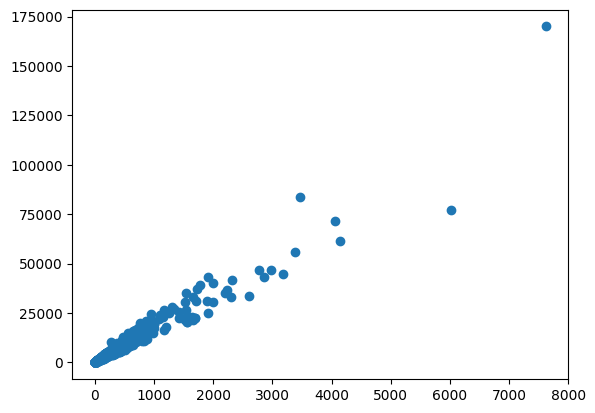

In [126]:
## Compare CO2 in mmols/ kg C water
plt.scatter(gdf['AvgOfCO2_o'], gdf['AvgOfpCO2'])

# Exploratory analysis

In [116]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          891 non-null    object  
 1   Lat_DD      891 non-null    float64 
 2   Lon_DD      891 non-null    float64 
 3   AvgOfTempC  891 non-null    float64 
 4   AvgOfpH     891 non-null    float64 
 5   AvgOfALKum  891 non-null    float64 
 6   AvgOfCO2_o  891 non-null    float64 
 7   StDevOfCO2  891 non-null    float64 
 8   AvgOfpCO2   891 non-null    float64 
 9   StDevOfpCO  891 non-null    float64 
 10  EID         891 non-null    object  
 11  geometry    891 non-null    geometry
dtypes: float64(9), geometry(1), object(2)
memory usage: 83.7+ KB


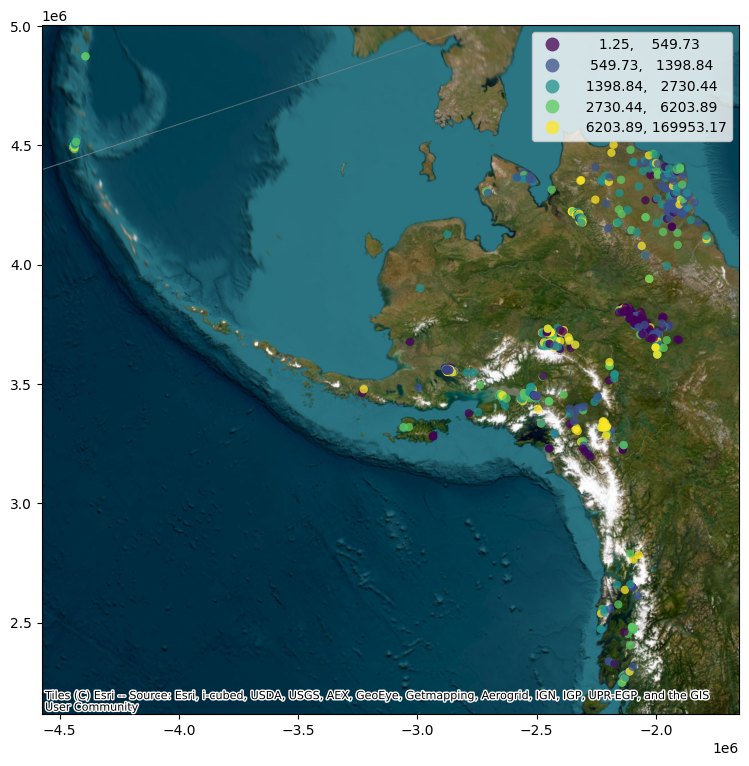

In [12]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf.plot(
    column=variable,
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    # legend_kwds={"loc": 2},
    ax=ax,
)
contextily.add_basemap(
    ax,
    crs=gdf.crs,
    source=contextily.providers.Esri.WorldImagery,
    zoom=5
)
# ax.set_axis_off()
# ax.set_xlim([-2.e7, -1.4e7]) # in web mercator
# ax.set_ylim([ymin, ymax])

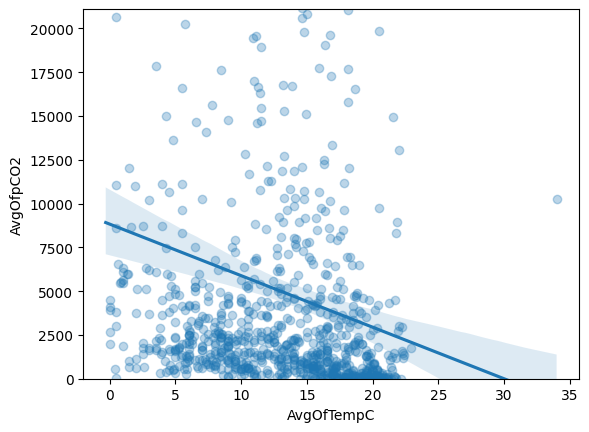

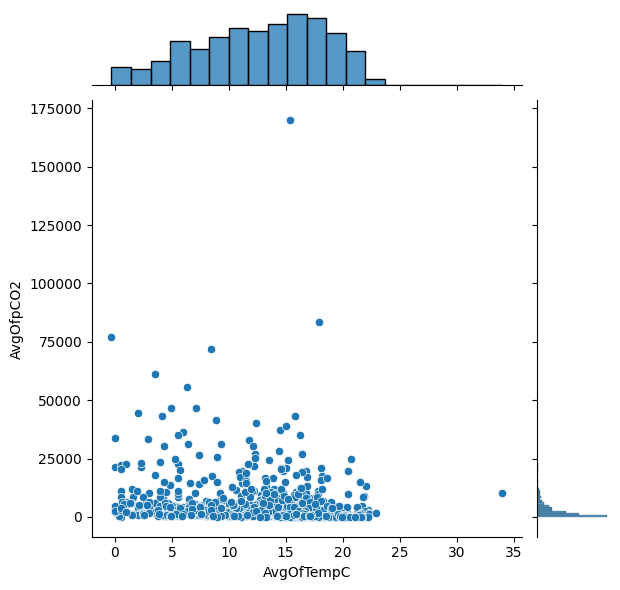

In [118]:
fig, ax = plt.subplots(1, 1)
sns.regplot(gdf, x='AvgOfTempC', y='AvgOfpCO2', ax=ax, scatter_kws={'alpha':0.3})
ax.set_ylim([0, np.quantile(gdf.AvgOfpCO2, 0.95)])
sns.jointplot(gdf, x='AvgOfTempC', y='AvgOfpCO2')

# Moran's I

In [114]:
# Create spatial weights matrix 
# w = KNN.from_dataframe(gdf, k=8)
w = DistanceBand(gdf[['Lat_DD',	'Lon_DD']], 1., binary=False) # not projected, one degree max leads to islands

# Standardize the weights matrix
w.transform = 'R'

('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 190, ' is an island (no neighbors)')
('WARNING: ', 211, ' is an island (no neighbors)')
('WARNING: ', 244, ' is an island (no neighbors)')
('WARNING: ', 270, ' is an island (no neighbors)')


/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/scipy/sparse/_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 31 disconnected components.
 There are 8 islands with ids: 83, 85, 88, 110, 190, 211, 244, 270.
  w = W(neighbors, weights, ids, **kwargs)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 31 disconnected components.
 There are 8 islands with ids: 83, 85, 88, 110, 190, 211, 244, 270.
  W.__init__(


In [ ]:
w.weights
# np.any([0.125 not in weights for weights in w.weights.values()])

{0: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 1: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 2: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 3: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 4: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 5: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 6: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 7: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 8: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 9: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 10: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 11: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 12: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 13: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 14: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 15: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 1

In [65]:
DistanceBand?

Init signature:
DistanceBand(
    data,
    threshold,
    p=2,
    alpha=-1.0,
    binary=True,
    ids=None,
    build_sp=True,
    silence_warnings=False,
    distance_metric='euclidean',
    radius=None,
)
Docstring:     
Spatial weights based on distance band.

Parameters
----------
data        : array
              (n,k) or KDTree where KDtree.data is array (n,k)
              n observations on k characteristics used to measure
              distances between the n objects
threshold  : float
             distance band
p          : float
             DEPRECATED: use `distance_metric`
             Minkowski p-norm distance metric parameter:
             1<=p<=infinity
             2: Euclidean distance
             1: Manhattan distance
binary     : boolean
             If true w_{ij}=1 if d_{i,j}<=threshold, otherwise w_{i,j}=0
             If false wij=dij^{alpha}
alpha      : float
             distance decay parameter for weight (default -1.0)
             if alpha is positive 

Moran's I: 0.12740182281253523
p-value: 0.003
z-score: 7.0157794926345485


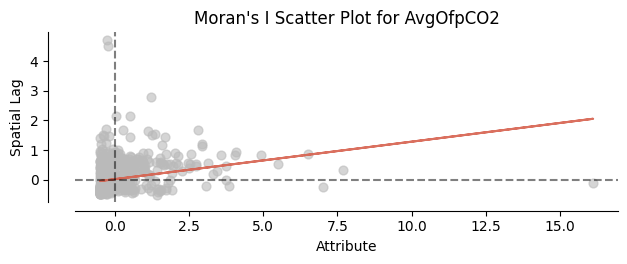

In [115]:
analyze_moran(gdf, w, variable)

Temperature is much more strongly auto-correlated

Moran's I: 0.5591077508332454
p-value: 0.001
z-score: 34.42891886136108


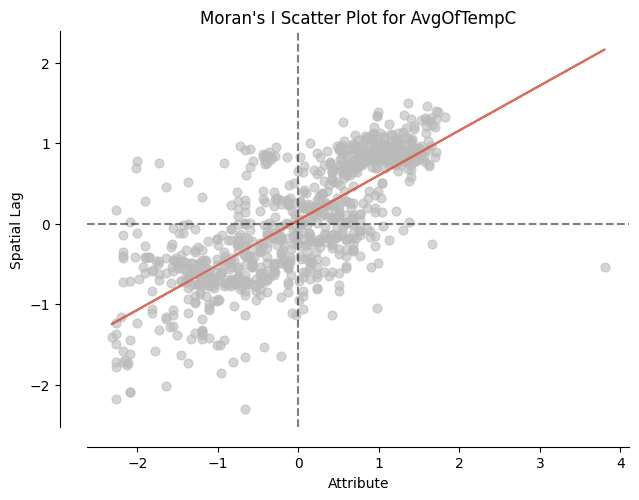

In [109]:
analyze_moran(gdf, w, 'AvgOfTempC')